### Imports

In [1]:
import pandas as pd
import numpy as np

import os, sys

import plotly
import plotly.express as px

# change the default renderer so it shows on something like Github
plotly.io.renderers.default = 'png'

#add my own file with custom utility functions as a module
utils_path = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir)))
if utils_path not in sys.path:
    sys.path.append(utils_path)

import aku_utils as ak

# pandas options
pd.options.display.max_columns = 100
pd.options.display.max_rows =  200
# pd.options.display.max_info_rows = 1690785
pd.options.display.max_info_columns = 200
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.date_dayfirst = True
pd.options.mode.chained_assignment = None

### Overview

In [2]:
df = pd.read_csv(os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, 'data', 'telco_processed.csv'))))
df.head()

,gender,age,married,dependents,number_of_dependents,city,latitude,longitude,population,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,churn_label,ibm_spss_churn_prob,cltv,churn_category,churn_reason,new_customer
0,1,78,0,0,0,Los Angeles,34.02,-118.16,68701,0,0,1,NaN,0,0.00,0,1,DSL,8,0,0,1,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,1,91,5433,Competitor,Competitor offered more data,0
1,0,74,1,1,1,Los Angeles,34.04,-118.19,55668,1,1,8,Offer E,1,48.85,1,1,Fiber Optic,17,0,1,0,0,0,0,0,1,Month-to-Month,1,Credit Card,80.65,633.30,0.00,0,390.80,"1,024.10",3,1,69,5302,Competitor,Competitor made better offer,0
2,1,71,0,1,3,Los Angeles,34.11,-118.23,47534,0,0,18,Offer D,1,11.33,1,1,Fiber Optic,52,0,0,0,0,1,1,1,1,Month-to-Month,1,Bank Withdrawal,95.45,"1,752.55",45.61,0,203.94,"1,910.88",2,1,81,3179,Competitor,Competitor made better offer,0
3,0,78,1,1,1,Inglewood,33.94,-118.33,27778,1,1,25,Offer C,1,19.76,0,1,Fiber Optic,12,0,1,1,0,1,1,0,1,Month-to-Month,1,Bank Withdrawal,98.50,"2,514.50",13.43,0,494.00,"2,995.07",2,1,88,5337,Dissatisfaction,Limited range of services,0
4,0,80,1,1,1,Whittier,33.97,-118.02,26265,1,1,37,Offer C,1,6.33,1,1,Fiber Optic,14,0,0,0,0,0,0,0,1,Month-to-Month,1,Bank Withdrawal,76.50,"2,868.15",0.00,0,234.21,"3,102.36",2,1,67,2793,Price,Extra data charges,0


# EDA

### Client portrait

First of all, let's explore what kind of people are using our services

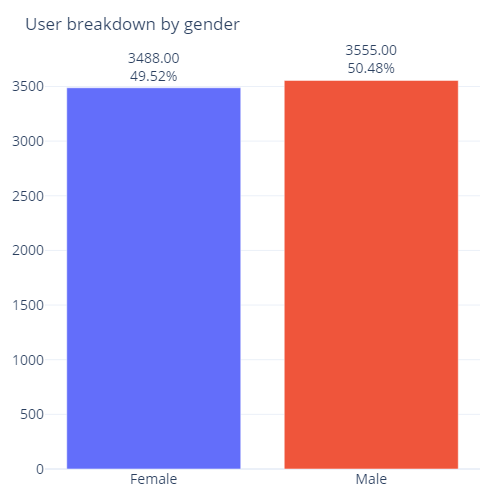

In [3]:
out = df.groupby('gender', as_index=False).size().replace({0 : 'Female', 1 : 'Male'})
ak.plot.fmt_bar(out, title='User breakdown by gender')

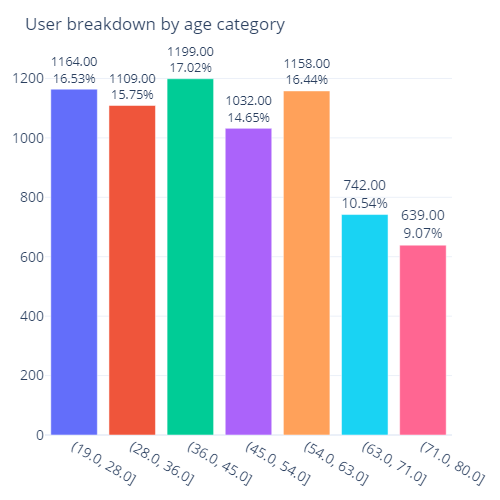

In [4]:
df['age_bin'], age_bins = pd.cut(df['age'], 7, precision=0, retbins=True)
df['age_bin'] = df['age_bin'].astype('str')

out = df.groupby('age_bin', as_index=False).size()
user_age = ak.plot.fmt_bar(out, title='User breakdown by age category')
user_age

It would be nice to compare our customer age breakdown with state age breakdown to see if some specific age groups are interested in our services or we undertarget these demographic groups.

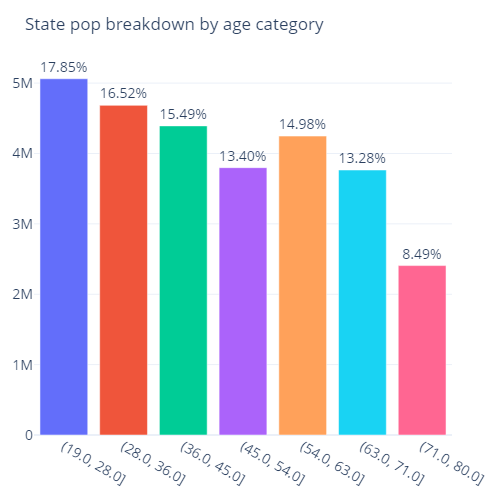

In [5]:
cali_pop = pd.read_excel(os.path.join(os.path.dirname('__file__'), os.path.pardir, 'data', 'P1B_State_Age.xlsx'), sheet_name='State Population by Age', skiprows=2)
cali_pop = cali_pop[['Population', '2022']].rename({'Population' : 'age', '2022' : 'pop'}, axis=1)
cali_pop['age'] = pd.to_numeric(cali_pop['age'], errors='coerce')
cali_pop = cali_pop[(cali_pop['age'] > 18) & (cali_pop['age'] < 81)]
cali_pop['age_bin'] = pd.cut(cali_pop['age'], bins=age_bins, precision=0).astype('str')
cali_pop = cali_pop.drop('age', axis=1)

out = cali_pop.groupby('age_bin', as_index=False)['pop'].sum()
state_age = ak.plot.fmt_bar(out, display_values=False, title='State pop breakdown by age category')
state_age

We see no signicant changes between customer and state population age: people of age 28-63 are slightly more prevalent in our customer base, but it's nothing significant.

### How the clients are using our services

### Churn analysis

In [6]:
services_list = ['phone_service', 'multiple_lines', 'internet_service', 'internet_type',
 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support',
 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data']

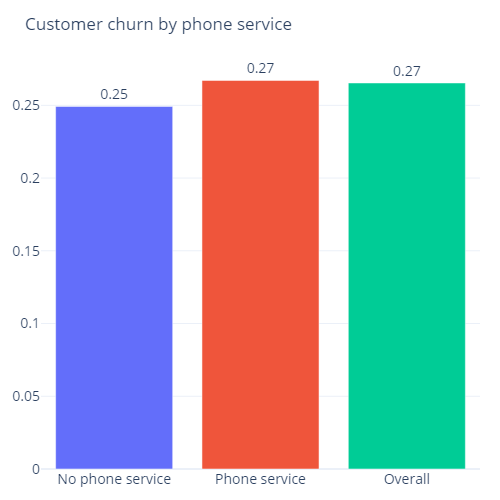

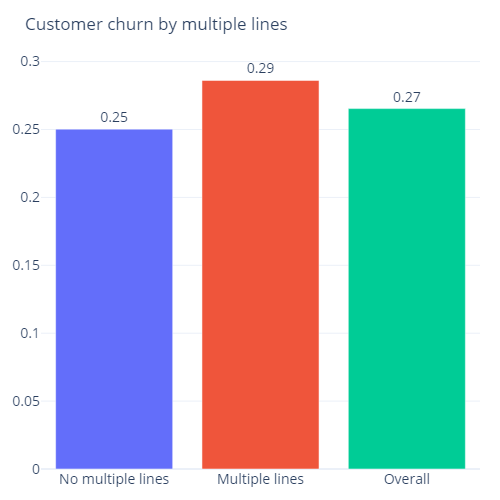

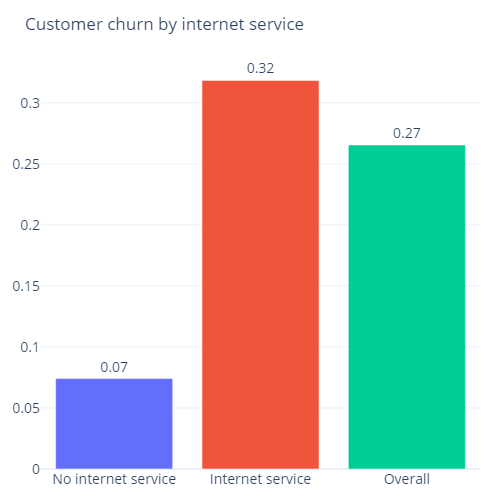

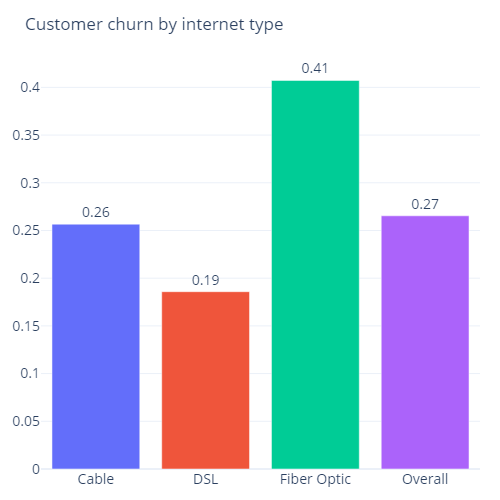

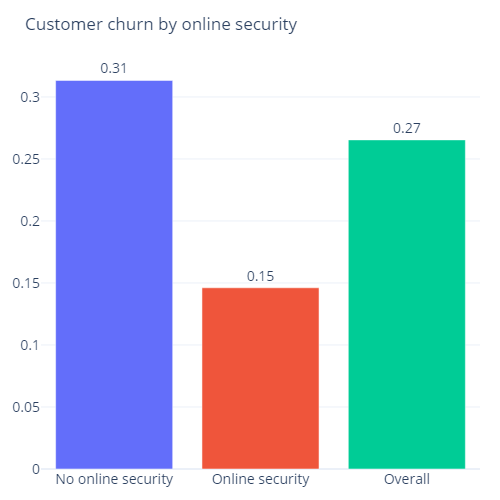

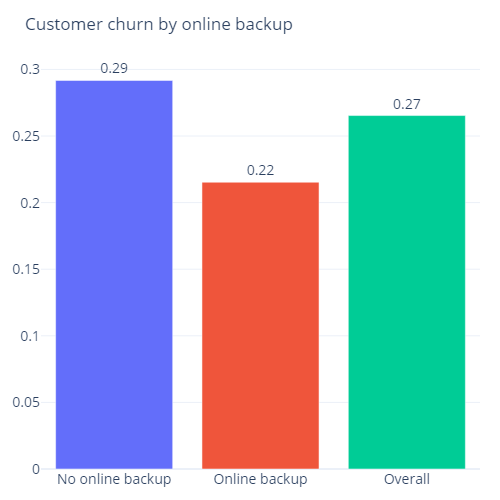

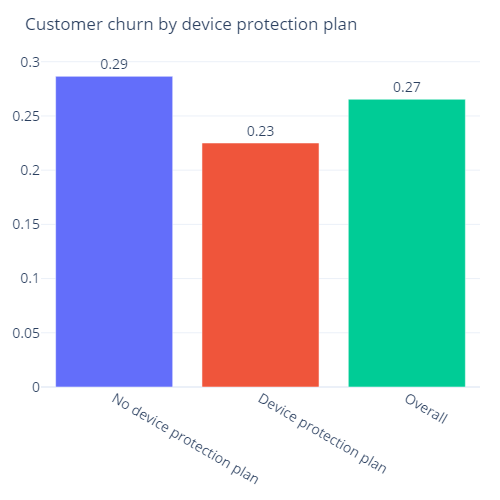

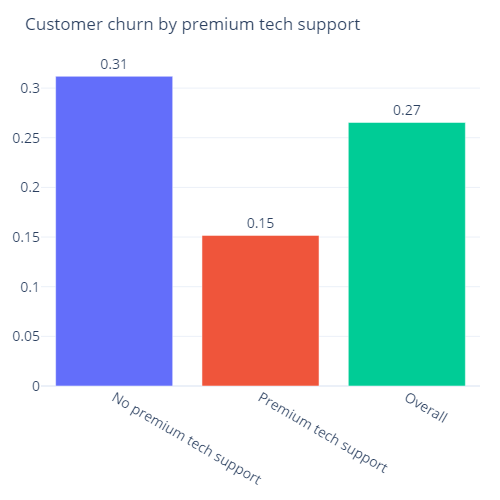

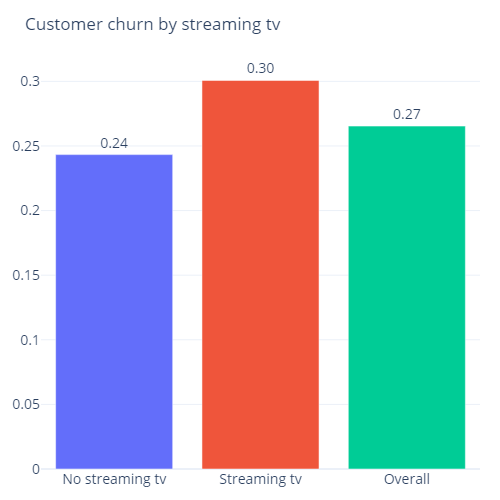

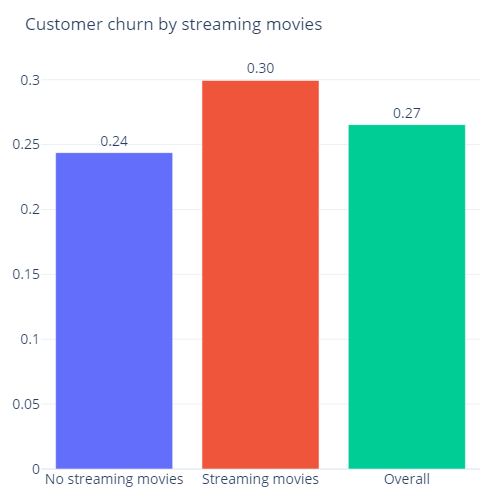

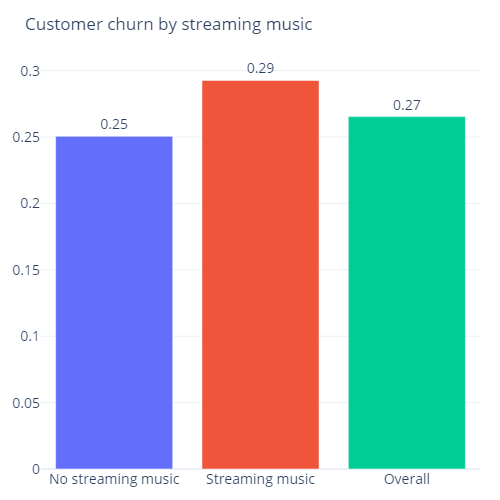

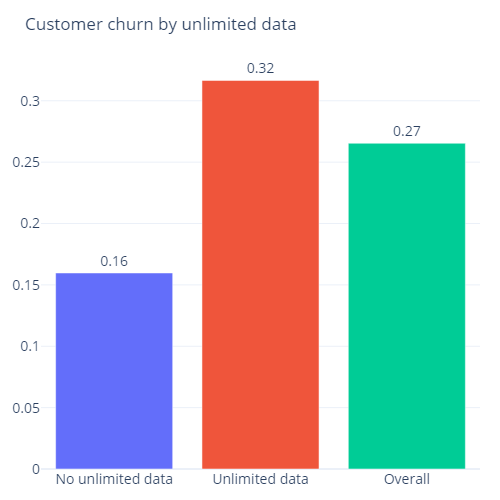

In [7]:
for service in services_list:
    out = ak.inspect_mean(df, group=service, target='churn_label')
    display(ak.plot.fmt_bar(out, display_pct=False, title=f"Customer churn by {service.replace('_', ' ')}"))

How are clients using our services:

Breakdown by service, service type

Sankey of service and its type\
\
Churn:
overall churn, churn by city or location (%: churned / all), % of churn by churn category,

score 1 by category, create a series with score 1 having 1 new score, 2 score having 2, 1 having 4. Plot this new dissatisfaction score

dissatisfaction by service, churn by service

sat. score histogram 1) total for comparison 2) by service 3) by internet service\
\
Association rule mining? Preferrably on churn


